#**Maestría en Inteligencia Artificial Aplicada (MNA)**
##**Procesamiento de Lenguaje Natural (NLP)**
###Prof. Luis Eduardo Falcón Morales
###**Semana 10 - Ejercicios Complementarios**
###Web-Scraping y generadores de Texto**

###**NOTA: Estos ejercicios no se deben entregar.**


In [1]:
import requests
from bs4 import BeautifulSoup as soup

Hay que seleccionar el hotel, después los comentarios, pero solo los de Español.


In [2]:
# Selecciones este hotel en particular como ejercicio de prueba:

url = 'https://www.tripadvisor.es/Hotel_Review-g3343018-d13336131-Reviews-City_Express_Monterrey_Lindavista-Guadalupe_Northern_Mexico.html'



html = requests.get(url,
                    headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}
                    )

print(html.status_code)     # la salida "200" solo es el status de que hubo respuesta con la página indicada.

200


Primero recopilemos todos los links de las opiniones:

In [3]:
links = []

max_or_num = 50  # El valor de max_or_num es el mayor múltiplo de 5 menor al total de reseñas en español.
                 # Como en este caso, al momento de hacer el web-scraping se tenían 53 comentarios en español,
                 # el valor de max_or_num sería 50.


reviews_x_pages = 5    # tienes que verificar si van de 10 en 10, o 5 en 5 las reseñas en cada página, porque cada caso es diferente....

for k in range(0, max_or_num, reviews_x_pages):
  a = url
  if k == 0:
    ss = '{}'     # Para la primera página es el -or con valor vacío.
  else:
    ss = str(k)  # convertimos a string el valor numérico.
  a = a[:(a.find('Reviews')+7)] + '-or' + ss + a[(a.find('Reviews')+7):]  # Los índices de "Reviews" van de 0 a 6, ya que tiene 7 letras.
  links.append(a)


links

['https://www.tripadvisor.es/Hotel_Review-g3343018-d13336131-Reviews-or{}-City_Express_Monterrey_Lindavista-Guadalupe_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g3343018-d13336131-Reviews-or5-City_Express_Monterrey_Lindavista-Guadalupe_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g3343018-d13336131-Reviews-or10-City_Express_Monterrey_Lindavista-Guadalupe_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g3343018-d13336131-Reviews-or15-City_Express_Monterrey_Lindavista-Guadalupe_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g3343018-d13336131-Reviews-or20-City_Express_Monterrey_Lindavista-Guadalupe_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g3343018-d13336131-Reviews-or25-City_Express_Monterrey_Lindavista-Guadalupe_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g3343018-d13336131-Reviews-or30-City_Express_Monterrey_Lindavista-Guadalupe_Northern_Mexico.html',
 'https://www.

###Ya tenemos los links de cada página de los comentarios, ahora procedemos a extraer los reviews que tiene cada página:

In [4]:
from random import randint
from time import sleep

Debes irte a la página del hotel que desees analizar, por ejemplo:

https://www.tripadvisor.es/Hotel_Review-g3343018-d13336131-Reviews-or35-City_Express_Monterrey_Lindavista-Guadalupe_Northern_Mexico.html

Ahí te bajas o buscas donde estén las "Opiniones", algo como lo que sigue:


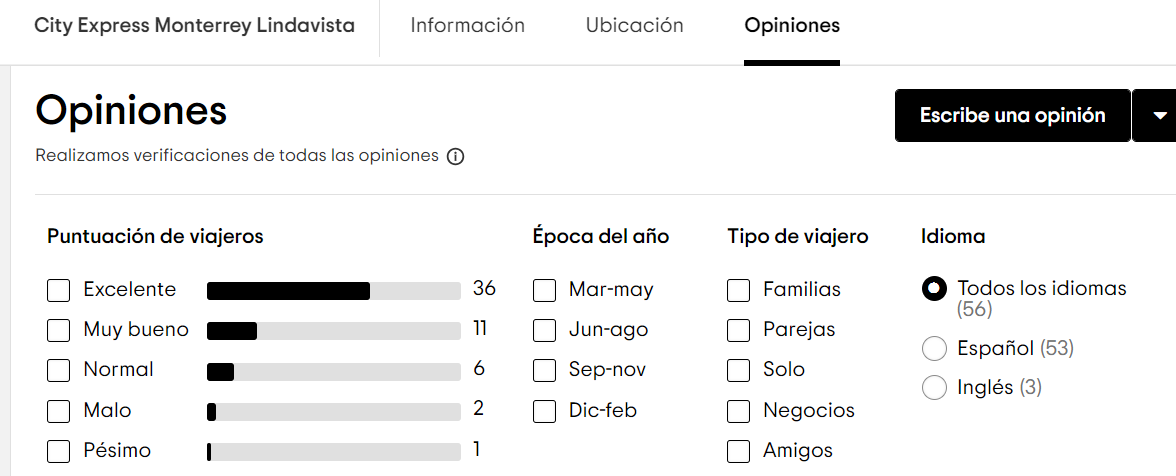

Ahora cambia y selecciona solamente los comentarios en Español, que en este caso son 53. Y una vez ahí, se deberán ver hacia abajo de la página, solamente los comentarios en Español, una vez que lo selecciones como se indica en la imagen de abajo.

Y una vez seleccionada la opción de Español, con el botón derecho, seleccionas "Inspect", como se indica en la imagen de abajo, para inspeccionar todos los reviews que deseas:

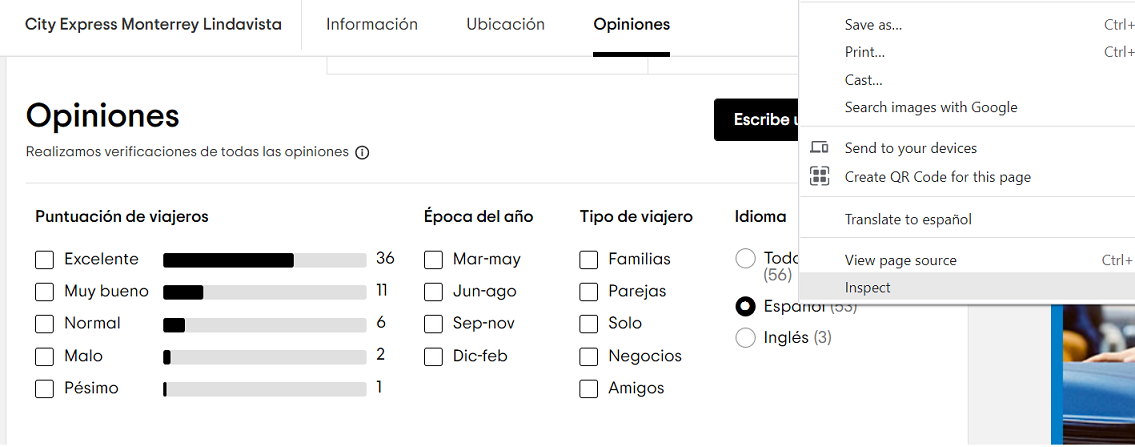

Ve moviendo el mouse hacia abajo, hasta que se sombree el texto y ahí empezarás a buscar las claves que requiere findAll().

Cada sección o recuadro de la página web tiene asociado una clave mediante cual podemos refernciarlo y accesar a su información.

Ver la siguiente imagen:

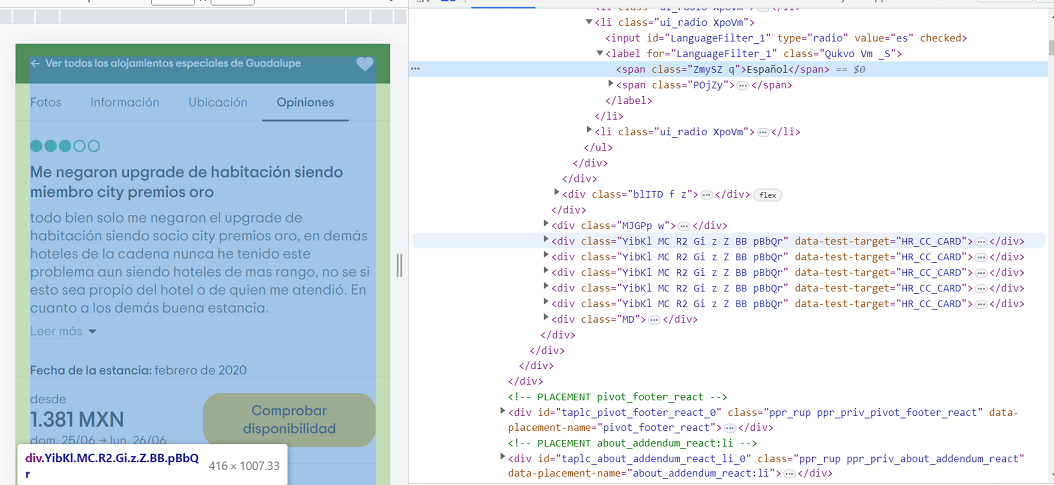

Ve bajando el mouse y abriendo pestañas (triangulitos), hasta que aparezca el texto/reseña en cuestión.

Los códigos que se encuentran en el rectángulo rojo, es lo que necesitamos:

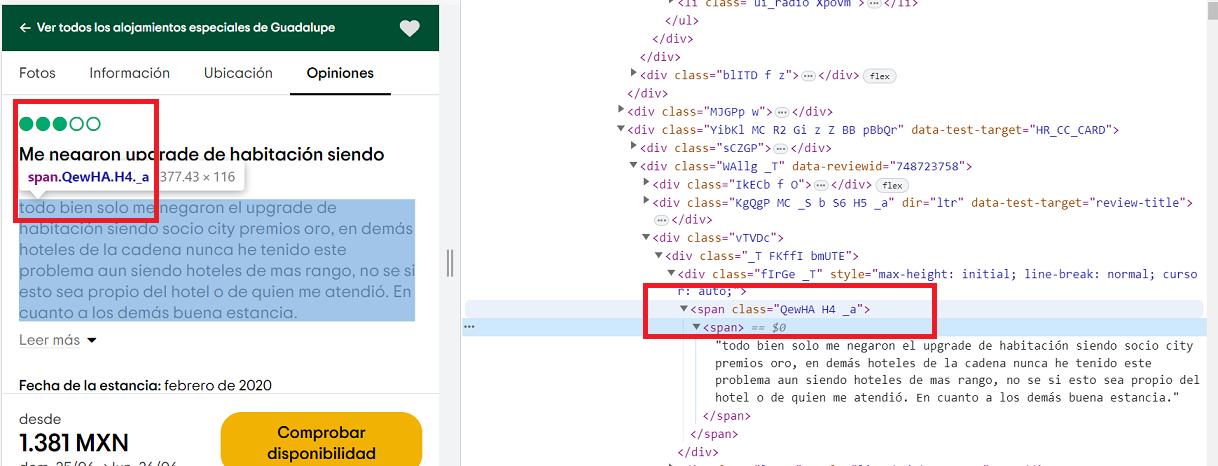

In [5]:
import re

In [10]:
reviews = []
stars =[]


numpages = int( max_or_num / reviews_x_pages )                    # puede tardar varios minutos si son muchos registros a extraer.

for link in links[0:numpages]:
  print(link)

  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36' }
  html2 = requests.get(link, headers=headers)
  #print(html2.status_code)

  sleep(randint(1,5))   # se incluyen intervalos de sleep para que no se estén haciendo llamadas de manera continua a la página
                        # y que al detectar esta actividad continua, se pueda detectar como una actividad sospechosa por el servidor
                        # y nos pueda bloquear de manera automática por ello.
  bsobj2 = soup(html2.content,'lxml')   # objeto de la librería BeautifulSoup para llevar a cabo nuestra tarea.

  # Extraemos los comentarios de cualquiera de las siguientes dos formas:
  # Incluimos algunos Print solo para visualizar la manera en que se lleva a cabo el proceso:

  #for review in bsobj2.findAll('span', class_='QewHA'):       # Forma 1:  Estamos en "span", Observa el guión-bajo al final de "class_"
  for review in bsobj2.findAll('span', {'class' : 'QewHA'}):   # Forma 2
      print(review.text)
      reviews.append(review.text.strip())

  sleep(randint(1,5))
  bsobj3 = soup(html2.content,'lxml')

  # Extraigamos también las calificaciones (estrellas):
  # Observa que las calificaciones están en unidades de 10, 20, 30, 40, 50.
  # En particular en este caso haremos la extracción de todo el string donde se encuentra la
  # calificación al hotel por parte del usuario y a partir de ahí mediante regex puedes
  # fácilmente realizar la extracción de la calificación:
  for cal in bsobj3.findAll('div', {'class' : 'Hlmiy'}):
    print(cal)
    #  Aquí puedes incluir tu regex para extraer solo la calificación numérica.
    stars.append(cal)


https://www.tripadvisor.es/Hotel_Review-g3343018-d13336131-Reviews-or{}-City_Express_Monterrey_Lindavista-Guadalupe_Northern_Mexico.html
todo bien solo me negaron el upgrade de habitación siendo socio city premios oro, en demás hoteles de la cadena nunca he tenido este problema aun siendo hoteles de mas rango, no se si esto sea propio del hotel o de quien me atendió. En cuanto a los demás buena estancia.
las reglas que mantienen para mi en lo personal son de calidad, la tranquilidad en protección en algún hotel me la habían otorgado, me encanta el hecho de cuando mando pedir comida el personal de seguridad acompaña al proveedor a entregármela a pero no lo hacen sin antes primeramente avisarme !! esto realmente me fascino .. Sugerencias NO cambien por favor
Excelente estancia. habitaciones con todo lo necesario para tener una cálido descanso así como area de trabajo. trato atento del personal, excelente servicio. Lo recomiendo y si volvería a hospedarme en cualquier City
es una excelent

In [11]:
print('Cantidad de comentarios extraídos:', len(reviews))
print('Cantidad de claificaciones:', len(stars))

Cantidad de comentarios extraídos: 50
Cantidad de claificaciones: 50


¡¡¡¡Ya tenemos los comentarios y sus calificaciones de este hotel!!!

A partir de estas listas puedes generar por ejemplo un DataFrame de Pandas o grabar los datos en un archivo CSV para trabajarlos ahora con los modelos Transformer.

---



##**Fin de los Ejercicios Compelmentarios de la Semana 10**